In [160]:
import pandas as pd
import glob

# 연도별 DataFrame 저장용 딕셔너리
yearly_congestion = {}

# 처리할 연도 리스트
years = [2021, 2022, 2023]

for year in years:
    # 해당 연도의 혼잡도 파일 목록 수집
    file_paths = sorted(glob.glob(f"data/raw/혼잡도/subway{year}-*.csv"))
    
    df_list = []
    for file in file_paths:
        df = pd.read_csv(file, encoding='utf-8-sig')
        
        # 컬럼명 정제
        df.columns = [col.strip() for col in df.columns]
        
        # 시간 정제
        df['hour'] = df['hour'].astype(str).str.extract(r'(\d{1,2})')[0].astype(int)
        
        # datetime 생성
        df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
        
        df_list.append(df)
    
    # 병합 후 딕셔너리에 저장
    yearly_congestion[year] = pd.concat(df_list, ignore_index=True)
    print(f"✅ {year}년도 데이터: {len(yearly_congestion[year]):,} rows")

# 예시: 2021년도 데이터 확인
yearly_congestion[2021].head()

✅ 2021년도 데이터: 5,452,143 rows
✅ 2022년도 데이터: 5,396,200 rows
✅ 2023년도 데이터: 5,520,981 rows


,train_subway21.tm,train_subway21.line,train_subway21.station_number,train_subway21.station_name,train_subway21.direction,train_subway21.stn,train_subway21.ta,train_subway21.wd,train_subway21.ws,train_subway21.rn_day,train_subway21.rn_hr1,train_subway21.hm,train_subway21.si,train_subway21.ta_chi,train_subway21.congestion,year,month,day,hour,datetime
0,2021010100,1,150,서울역,상선,419,-9.6,291.1,3.3,0.0,0.0,-99.0,-99.0,-12.6,0,2021,1,1,0,2021-01-01 00:00:00
1,2021010101,1,150,서울역,상선,419,-9.7,284.6,2.0,0.0,0.0,-99.0,-99.0,-9.8,0,2021,1,1,1,2021-01-01 01:00:00
2,2021010105,1,150,서울역,상선,419,-9.3,124.7,2.4,0.0,0.0,-99.0,-99.0,-10.3,1,2021,1,1,5,2021-01-01 05:00:00
3,2021010106,1,150,서울역,상선,419,-9.3,126.2,1.7,0.0,0.0,-99.0,-99.0,-10.1,2,2021,1,1,6,2021-01-01 06:00:00
4,2021010107,1,150,서울역,상선,419,-9.1,145.7,1.3,0.0,0.0,-99.0,-99.0,-9.7,3,2021,1,1,7,2021-01-01 07:00:00


In [161]:
# 예: 'train_subway21.역명', 'train_subway21.호선명', ... → 접두어 제거
def clean_columns(df):
    df.columns = [col.split('.')[-1] for col in df.columns]
    return df

# 각 연도별 DataFrame에 적용
for year in yearly_congestion:
    yearly_congestion[year] = clean_columns(yearly_congestion[year])

In [162]:
yearly_congestion[2021].head()

,tm,line,station_number,station_name,direction,stn,ta,wd,ws,rn_day,rn_hr1,hm,si,ta_chi,congestion,year,month,day,hour,datetime
0,2021010100,1,150,서울역,상선,419,-9.6,291.1,3.3,0.0,0.0,-99.0,-99.0,-12.6,0,2021,1,1,0,2021-01-01 00:00:00
1,2021010101,1,150,서울역,상선,419,-9.7,284.6,2.0,0.0,0.0,-99.0,-99.0,-9.8,0,2021,1,1,1,2021-01-01 01:00:00
2,2021010105,1,150,서울역,상선,419,-9.3,124.7,2.4,0.0,0.0,-99.0,-99.0,-10.3,1,2021,1,1,5,2021-01-01 05:00:00
3,2021010106,1,150,서울역,상선,419,-9.3,126.2,1.7,0.0,0.0,-99.0,-99.0,-10.1,2,2021,1,1,6,2021-01-01 06:00:00
4,2021010107,1,150,서울역,상선,419,-9.1,145.7,1.3,0.0,0.0,-99.0,-99.0,-9.7,3,2021,1,1,7,2021-01-01 07:00:00


In [163]:
station_name_map = {
    '신길온천': '능길',
    '총신대입구(이수)': '총신대입구',
    '뚝섬유원지': '자양(뚝섬한강공원)',
}
for year in yearly_congestion:
    yearly_congestion[year]['station_name'] = yearly_congestion[year]['station_name'].replace(station_name_map)

In [164]:
import numpy as np

# 모든 연도에 대해 전체 컬럼에서 -99 또는 -99.0 → np.nan 처리
for year in yearly_congestion:
    df = yearly_congestion[year]
    
    # 숫자형 컬럼만 선택하여 처리
    num_cols = df.select_dtypes(include=[np.number]).columns
    df[num_cols] = df[num_cols].replace([-99, -99.0], np.nan)
    
    yearly_congestion[year] = df

In [165]:
for year, df in yearly_congestion.items():
    print(f"\n📅 {year}년도 결측치 수 (-99-> NaN 처리 후):")
    print(df.isna().sum().sort_values(ascending=False))


📅 2021년도 결측치 수 (-99-> NaN 처리 후):
si                1977623
hm                 695604
rn_hr1             122418
rn_day             119472
ta                  72798
wd                  72550
ws                  72550
ta_chi                  2
hour                    0
day                     0
month                   0
year                    0
congestion              0
tm                      0
line                    0
stn                     0
direction               0
station_name            0
station_number          0
datetime                0
dtype: int64

📅 2022년도 결측치 수 (-99-> NaN 처리 후):
si                2010112
rn_hr1              89830
rn_day              85970
wd                  49768
ws                  49768
hm                  42860
ta                  37922
ta_chi                314
hour                    0
day                     0
month                   0
year                    0
congestion              0
tm                      0
line                    0
stn      

In [166]:
# si 컬럼 제거
for year in yearly_congestion:
    df = yearly_congestion[year]
    if 'si' in df.columns:
        df = df.drop(columns=['si'])
    yearly_congestion[year] = df

In [167]:
for year, df in yearly_congestion.items():
    wrong = df[df['hour'] == 23]
    if not wrong.empty:
        sample = wrong[['year', 'month', 'day', 'hour', 'datetime']].drop_duplicates().head(5)
        print(f"\n📅 {year}년도 23시 샘플:")
        print(sample)


📅 2021년도 23시 샘플:
     year  month  day  hour            datetime
20   2021      1    1    23 2021-01-01 23:00:00
41   2021      1    2    23 2021-01-02 23:00:00
62   2021      1    3    23 2021-01-03 23:00:00
83   2021      1    4    23 2021-01-04 23:00:00
104  2021      1    5    23 2021-01-05 23:00:00

📅 2022년도 23시 샘플:
     year  month  day  hour            datetime
20   2022      1    1    23 2022-01-01 23:00:00
41   2022      1    2    23 2022-01-02 23:00:00
62   2022      1    3    23 2022-01-03 23:00:00
83   2022      1    4    23 2022-01-04 23:00:00
104  2022      1    5    23 2022-01-05 23:00:00

📅 2023년도 23시 샘플:
     year  month  day  hour            datetime
20   2023      1    1    23 2023-01-01 23:00:00
41   2023      1    2    23 2023-01-02 23:00:00
62   2023      1    3    23 2023-01-03 23:00:00
83   2023      1    4    23 2023-01-04 23:00:00
104  2023      1    5    23 2023-01-05 23:00:00


In [13]:
def print_top_na_stn(yearly_congestion, top_n=10):
    for year, df in yearly_congestion.items():
        # 전체 결측치 수 계산 (row별로 결측치 개수 → stn별로 집계)
        na_per_row = df.isna().sum(axis=1)
        df_with_na = df.copy()
        df_with_na['na_count'] = na_per_row

        # stn별 총 결측치 수
        stn_na_total = df_with_na.groupby('stn')['na_count'].sum().sort_values(ascending=False)

        print(f"\n📅 {year}년도 결측치 많은 stn TOP {top_n}:")
        print(stn_na_total.head(top_n))

print_top_na_stn(yearly_congestion, top_n=10)


📅 2021년도 결측치 많은 stn TOP 10:
stn
419    282176
421    172244
510    134862
415     98190
402     93456
433     47256
450     37996
411     37284
437     34020
477     30000
Name: na_count, dtype: int64

📅 2022년도 결측치 많은 stn TOP 10:
stn
540    23836
435    21280
425    20484
406    18956
400    18480
112    18382
369    15620
110    13808
108    13248
649    12870
Name: na_count, dtype: int64

📅 2023년도 결측치 많은 stn TOP 10:
stn
540    257220
369    100544
572     93408
411     51350
434     34074
407     30498
406     23296
110     15200
419     11904
408     11726
Name: na_count, dtype: int64


In [168]:
# stn 그룹 정의
stn_groups = {
    "서울북부": [90, 201, 295, 427],
    "서울동부": [276, 294],
    "서울서부": [110, 232, 266],
    "서울중부": [108, 400, 402, 408, 409, 411, 412, 413, 414, 415,
               418, 419, 421, 444, 450, 510, 540, 889],
    "인천": [99, 649, 102, 435, 844, 846],
    "경기북부": [98, 211, 217, 372, 373, 406, 407, 424, 428, 431, 450, 451, 454, 477, 532, 540, 541],
    "경기남부": [119, 202, 203, 212, 369, 572],
    "경기서부": [112, 284, 285, 286, 287, 288,
              410, 423, 425, 433, 434, 437, 438, 545, 565, 590]
}

In [169]:
def na_by_stn_group(yearly_congestion, stn_groups, top_n=5):
    for year, df in yearly_congestion.items():
        print(f"\n📅 {year}년도 그룹별 결측치 합계:")

        # row별 결측치 수 계산
        df['na_count'] = df.isna().sum(axis=1)

        for group_name, stn_list in stn_groups.items():
            group_sum = df[df['stn'].isin(stn_list)]['na_count'].sum()
            print(f"{group_name:10s}: {group_sum:,}건")

        df.drop(columns='na_count', inplace=True)

na_by_stn_group(yearly_congestion, stn_groups)


📅 2021년도 그룹별 결측치 합계:
서울북부      : 672건
서울동부      : 0건
서울서부      : 20,000건
서울중부      : 926,550건
인천        : 12,470건
경기북부      : 122,872건
경기남부      : 13,136건
경기서부      : 112,330건

📅 2022년도 그룹별 결측치 합계:
서울북부      : 640건
서울동부      : 0건
서울서부      : 13,808건
서울중부      : 133,868건
인천        : 34,150건
경기북부      : 94,330건
경기남부      : 25,448건
경기서부      : 89,084건

📅 2023년도 그룹별 결측치 합계:
서울북부      : 392건
서울동부      : 0건
서울서부      : 15,200건
서울중부      : 376,408건
인천        : 6,620건
경기북부      : 334,222건
경기남부      : 193,952건
경기서부      : 58,532건


In [170]:
def find_least_missing_stn(df, stn_list):
    df['na_count'] = df.isna().sum(axis=1)
    stn_na = df[df['stn'].isin(stn_list)].groupby('stn')['na_count'].sum()
    best_stn = stn_na.sort_values().index[0]
    df.drop(columns='na_count', inplace=True)
    return best_stn

In [171]:
def fill_missing_by_best_stn(df, stn_group, best_stn, target_cols):
    df = df.copy()

    # 기준값 dataframe: 해당 stn의 값만 필터링
    best_df = df[df['stn'] == best_stn][['datetime'] + target_cols].set_index('datetime')

    # datetime 기준으로 merge
    df = df.set_index('datetime')
    df_best = best_df.rename(columns={col: f"{col}_ref" for col in target_cols})
    df = df.join(df_best, how='left')

    # 결측인 값만 기준값으로 채우기
    for col in target_cols:
        df[col] = df[col].fillna(df[f"{col}_ref"])
        df.drop(columns=[f"{col}_ref"], inplace=True)

    df = df.reset_index()
    return df

In [172]:
seoul_central_stns = [108, 400, 402, 408, 409, 411, 412, 413, 414, 415,
                      418, 419, 421, 444, 450, 510, 540, 889]

# 타겟 변수
target_cols = ['ta', 'hm', 'ws', 'wd', 'rn_hr1', 'rn_day', 'ta_chi']

# 2021년도 기준 적용
df = yearly_congestion[2021]
best_stn = find_least_missing_stn(df, seoul_central_stns)
print(f"✅ 서울중부 결측 가장 적은 기준 stn: {best_stn}")

✅ 서울중부 결측 가장 적은 기준 stn: 409


In [ ]:
import copy

# 보간 전 원본 백업
yearly_congestion_backup = {year: df.copy(deep=True) for year, df in yearly_congestion.items()}

print("✅ 백업 완료 → 변수명: yearly_congestion_backup")

✅ 보간 전 백업 완료 → 변수명: yearly_congestion_backup


In [174]:
df_filled = fill_missing_by_best_stn(df, seoul_central_stns, best_stn, target_cols)

# 저장
yearly_congestion[2021] = df_filled

In [175]:
yearly_congestion

{2021:                     datetime          tm  line  station_number station_name  \
 0        2021-01-01 00:00:00  2021010100     1             150          서울역   
 1        2021-01-01 00:00:00  2021010100     1             150          서울역   
 2        2021-01-01 00:00:00  2021010100     1             150          서울역   
 3        2021-01-01 00:00:00  2021010100     1             150          서울역   
 4        2021-01-01 00:00:00  2021010100     1             150          서울역   
 ...                      ...         ...   ...             ...          ...   
 65425711 2021-12-31 23:00:00  2021123123     8            2828          남위례   
 65425712 2021-12-31 23:00:00  2021123123     8            2828          남위례   
 65425713 2021-12-31 23:00:00  2021123123     8            2828          남위례   
 65425714 2021-12-31 23:00:00  2021123123     8            2828          남위례   
 65425715 2021-12-31 23:00:00  2021123123     8            2828          남위례   
 
          direction  stn   ta   

C:\Users\somee\AppData\Local\Temp\ipykernel_19400\3127274838.py:30: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\somee\AppData\Local\Temp\ipykernel_19400\3127274838.py:30: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\somee\AppData\Local\Temp\ipykernel_19400\3127274838.py:30: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\somee\AppData\Local\Temp\ipykernel_19400\3127274838.py:30: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\somee\AppData\Local\Temp\ipykernel_19400\3127274838.py:30: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\somee\AppData\Local\Temp\ipykernel_19400\3127274838.py:30: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from f

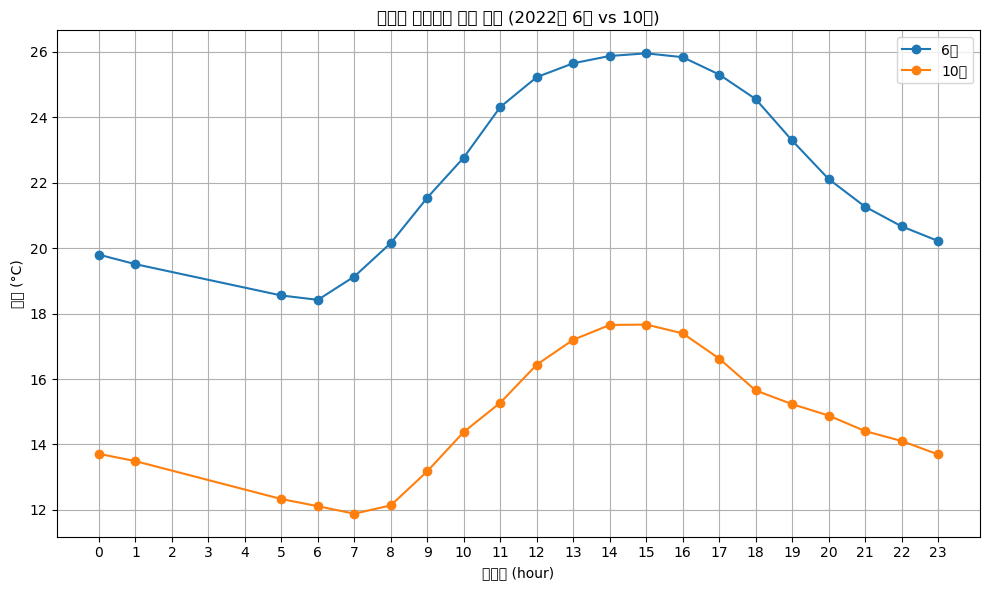

In [176]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. 연도 병합
df_all = pd.concat(yearly_congestion.values(), ignore_index=True)

# 2. 서울역 + 2022년 6월, 10월 필터링
mask = (
    (df_all['station_name'] == '서울역') &
    (df_all['year'] == 2021) &
    (df_all['month'].isin([6, 10])) &
    (df_all['ta'].notna())
)
seoul_subset = df_all[mask]

# 3. 월별로 시간대별 평균 기온 계산
hourly_temp = seoul_subset.groupby(['month', 'hour'])['ta'].mean().unstack(0)

# 4. 그래프
plt.figure(figsize=(10, 6))
for month in [6, 10]:
    plt.plot(hourly_temp.index, hourly_temp[month], marker='o', label=f"{month}월")

plt.title("서울역 시간대별 평균 기온 (2022년 6월 vs 10월)")
plt.xlabel("시간대 (hour)")
plt.ylabel("기온 (°C)")
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [177]:
def na_by_stn_group(yearly_congestion, stn_groups, top_n=5):
    for year, df in yearly_congestion.items():
        print(f"\n📅 {year}년도 그룹별 결측치 합계:")

        # row별 결측치 수 계산
        df['na_count'] = df.isna().sum(axis=1)

        for group_name, stn_list in stn_groups.items():
            group_sum = df[df['stn'].isin(stn_list)]['na_count'].sum()
            print(f"{group_name:10s}: {group_sum:,}건")

        df.drop(columns='na_count', inplace=True)

na_by_stn_group(yearly_congestion, stn_groups)


📅 2021년도 그룹별 결측치 합계:
서울북부      : 240건
서울동부      : 0건
서울서부      : 1,536건
서울중부      : 86,712건
인천        : 240건
경기북부      : 4,440건
경기남부      : 144건
경기서부      : 3,552건

📅 2022년도 그룹별 결측치 합계:
서울북부      : 640건
서울동부      : 0건
서울서부      : 13,808건
서울중부      : 133,868건
인천        : 34,150건
경기북부      : 94,330건
경기남부      : 25,448건
경기서부      : 89,084건

📅 2023년도 그룹별 결측치 합계:
서울북부      : 392건
서울동부      : 0건
서울서부      : 15,200건
서울중부      : 376,408건
인천        : 6,620건
경기북부      : 334,222건
경기남부      : 193,952건
경기서부      : 58,532건


In [178]:
# stn 그룹 정의
stn_groups = {
    "서울북부": [90, 201, 295, 427],
    "서울동부": [276, 294],
    "서울서부": [110, 232, 266],
    "서울중부": [108, 400, 402, 408, 409, 411, 412, 413, 414, 415,
               418, 419, 421, 444, 450, 510, 540, 889],
    "인천": [99, 649, 102, 435, 844, 846],
    "경기북부": [98, 211, 217, 372, 373, 406, 407, 424, 428, 431, 450, 451, 454, 477, 532, 540, 541],
    "경기남부": [119, 202, 203, 212, 369, 572],
    "경기서부": [112, 284, 285, 286, 287, 288,
              410, 423, 425, 433, 434, 437, 438, 545, 565, 590]
}

In [179]:
def fill_missing_by_best_stn_efficient(df, stn_group, best_stn, target_cols):
    df = df.copy()

    # 기준 stn 값만 추출
    best_df = df[df['stn'] == best_stn][['datetime'] + target_cols].dropna().set_index('datetime')

    # 보간 대상만 추출
    mask = (df['stn'].isin(stn_group)) & (df[target_cols].isna().any(axis=1))
    fill_df = df[mask].copy().set_index('datetime')

    # 기준값 join
    ref_cols = {col: f"{col}_ref" for col in target_cols}
    fill_df = fill_df.join(best_df.rename(columns=ref_cols), how='left')

    # 보간된 수 카운트용
    filled_count = {}

    # 보간 수행
    for col in target_cols:
        before = fill_df[col].isna().sum()
        fill_df[col] = fill_df[col].fillna(fill_df[f"{col}_ref"])
        after = fill_df[col].isna().sum()
        filled_count[col] = before - after
        fill_df.drop(columns=[f"{col}_ref"], inplace=True)

    # 반영
    df.update(fill_df.reset_index())

    return df, filled_count


In [180]:
def find_least_missing_stn(df, stn_list):
    df = df.copy()
    df['na_count'] = df.isna().sum(axis=1)

    filtered = df[df['stn'].isin(stn_list)]
    if filtered.empty:
        print(f"    ⚠️ 데이터 없음 → stn_list: {stn_list}")
        return None

    stn_na = filtered.groupby('stn')['na_count'].sum()
    if stn_na.empty:
        print(f"    ⚠️ 모든 행 결측 → stn_list: {stn_list}")
        return None

    return stn_na.sort_values().index[0]

In [181]:
# 보간 대상 변수
target_cols = ['ta', 'hm', 'ws', 'wd', 'rn_hr1', 'rn_day', 'ta_chi']

# 전체 연도, 권역 보간 + 디버깅 로그
for year in [2021, 2022, 2023]:
    print(f"\n📅 {year}년도 전체 권역 보간 시작")
    df = yearly_congestion[year]

    for region_name, stn_list in stn_groups.items():
        df_region = df[df['stn'].isin(stn_list)]
        best_stn = find_least_missing_stn(df_region, stn_list)

        if best_stn is None:
            print(f"  ⚠️ {region_name:10s} → 기준 stn 없음 (스킵)")
            continue

        print(f"  📍 {region_name:10s} → 기준 stn: {best_stn}")

        df, filled_count = fill_missing_by_best_stn_efficient(df, stn_list, best_stn, target_cols)

        for var, count in filled_count.items():
            if count > 0:
                print(f"      {var:8s} 보간: {count:,}건")

    yearly_congestion[year] = df


📅 2021년도 전체 권역 보간 시작
  📍 서울북부       → 기준 stn: 427


C:\Users\somee\AppData\Local\Temp\ipykernel_19400\750369377.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[22 22 22 ... 23 23 23]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.update(fill_df.reset_index())


    ⚠️ 데이터 없음 → stn_list: [276, 294]
  ⚠️ 서울동부       → 기준 stn 없음 (스킵)
  📍 서울서부       → 기준 stn: 110


MemoryError: Unable to allocate 4.39 GiB for an array with shape (9, 65425716) and data type int64

In [27]:
na_by_stn_group(yearly_congestion, stn_groups)


📅 2021년도 그룹별 결측치 합계:
서울북부      : 240건
서울동부      : 0건
서울서부      : 1,536건
서울중부      : 83,616건
인천        : 240건
경기북부      : 2,544건
경기남부      : 96건
경기서부      : 3,072건

📅 2022년도 그룹별 결측치 합계:
서울북부      : 352건
서울동부      : 0건
서울서부      : 10,592건
서울중부      : 122,448건
인천        : 33,170건
경기북부      : 84,682건
경기남부      : 18,628건
경기서부      : 79,886건

📅 2023년도 그룹별 결측치 합계:
서울북부      : 392건
서울동부      : 0건
서울서부      : 15,200건
서울중부      : 373,680건
인천        : 6,480건
경기북부      : 330,628건
경기남부      : 192,156건
경기서부      : 58,124건


In [29]:
from scipy.optimize import minimize
import numpy as np

# 체감온도 계산 함수 (V는 m/s)
def compute_winter_feel_temp(ta, v):
    v_kmh = v * 3.6  # 풍속 단위 변환
    v16 = v_kmh ** 0.16
    return 13.12 + 0.6215 * ta - 11.37 * v16 + 0.3965 * v16 * ta

# ta를 모를 때 (ws와 ta_chi 주어짐)
def estimate_ta(ta_chi, ws):
    def loss(ta):
        pred = compute_winter_feel_temp(ta[0], ws)
        return (pred - ta_chi) ** 2
    result = minimize(loss, x0=[ta_chi], bounds=[(-40, 20)])
    return result.x[0] if result.success else np.nan

# ws를 모를 때 (ta와 ta_chi 주어짐)
def estimate_ws(ta_chi, ta):
    def loss(ws):
        pred = compute_winter_feel_temp(ta, ws[0])
        return (pred - ta_chi) ** 2
    result = minimize(loss, x0=[2.0], bounds=[(0.1, 20)])
    return result.x[0] if result.success else np.nan

In [30]:
# 겨울철만 필터링
winter_df = df[df['month'].isin([10, 11, 12, 1, 2, 3, 4])].copy()

# 결측 ta를 추정할 경우
mask = winter_df['ta'].isna() & winter_df['ws'].notna() & winter_df['ta_chi'].notna()
winter_df.loc[mask, 'ta'] = winter_df.loc[mask].apply(
    lambda row: estimate_ta(row['ta_chi'], row['ws']), axis=1
)

# 결측 ws를 추정할 경우
mask = winter_df['ws'].isna() & winter_df['ta'].notna() & winter_df['ta_chi'].notna()
winter_df.loc[mask, 'ws'] = winter_df.loc[mask].apply(
    lambda row: estimate_ws(row['ta_chi'], row['ta']), axis=1
)

In [31]:
from scipy.optimize import minimize
import numpy as np

# 습구온도 계산
def compute_tw(ta, rh):
    try:
        rh_sqrt = np.sqrt(rh + 8.313659)
        rh_pow_3_2 = rh ** 1.5
        return (
            ta * np.arctan(0.151977 * rh_sqrt)
            + np.arctan(ta + rh)
            - np.arctan(rh - 1.67633)
            + 0.00391838 * rh_pow_3_2 * np.arctan(0.023101 * rh)
            - 4.686035
        )
    except:
        return np.nan

# 여름 체감온도 계산
def compute_summer_feel_temp(ta, rh):
    tw = compute_tw(ta, rh)
    return -0.2442 + 0.55399 * tw + 0.45535 * ta - 0.0022 * (tw ** 2) + 0.00278 * tw * ta + 3.0

In [32]:
# ta 추정 (ta_chi와 rh가 있는 경우)
def estimate_ta_summer(ta_chi, rh):
    def loss(ta):
        pred = compute_summer_feel_temp(ta[0], rh)
        return (pred - ta_chi) ** 2
    result = minimize(loss, [25], bounds=[(10, 45)])
    return result.x[0] if result.success else np.nan

# rh 추정 (ta_chi와 ta가 있는 경우)
def estimate_rh_summer(ta_chi, ta):
    def loss(rh):
        pred = compute_summer_feel_temp(ta, rh[0])
        return (pred - ta_chi) ** 2
    result = minimize(loss, [50], bounds=[(10, 100)])
    return result.x[0] if result.success else np.nan

In [33]:
for year in [2021, 2022, 2023]:
    print(f"\n📅 {year}년도 계절별 보간 시작")
    df = yearly_congestion[year]

    ### ❄️ 겨울철 (10월~4월)
    winter_df = df[df['month'].isin([10, 11, 12, 1, 2, 3, 4])].copy()

    # ta 보간
    mask_ta_w = winter_df['ta'].isna() & winter_df['ws'].notna() & winter_df['ta_chi'].notna()
    print(f"  ❄️ ta 보간 대상: {mask_ta_w.sum():,}건")
    winter_df.loc[mask_ta_w, 'ta'] = winter_df.loc[mask_ta_w].apply(
        lambda row: estimate_ta(row['ta_chi'], row['ws']), axis=1
    )

    # ws 보간
    mask_ws_w = winter_df['ws'].isna() & winter_df['ta'].notna() & winter_df['ta_chi'].notna()
    print(f"  ❄️ ws 보간 대상: {mask_ws_w.sum():,}건")
    winter_df.loc[mask_ws_w, 'ws'] = winter_df.loc[mask_ws_w].apply(
        lambda row: estimate_ws(row['ta_chi'], row['ta']), axis=1
    )

    df.update(winter_df)

    ### ☀️ 여름철 (5~9월)
    summer_df = df[df['month'].between(5, 9)].copy()

    # ta 보간
    mask_ta_s = summer_df['ta'].isna() & summer_df['hm'].notna() & summer_df['ta_chi'].notna()
    print(f"  ☀️ ta 보간 대상: {mask_ta_s.sum():,}건")
    summer_df.loc[mask_ta_s, 'ta'] = summer_df.loc[mask_ta_s].apply(
        lambda row: estimate_ta_summer(row['ta_chi'], row['hm']), axis=1
    )

    # hm 보간
    mask_hm_s = summer_df['hm'].isna() & summer_df['ta'].notna() & summer_df['ta_chi'].notna()
    print(f"  ☀️ hm 보간 대상: {mask_hm_s.sum():,}건")
    summer_df.loc[mask_hm_s, 'hm'] = summer_df.loc[mask_hm_s].apply(
        lambda row: estimate_rh_summer(row['ta_chi'], row['ta']), axis=1
    )

    df.update(summer_df)

    # 저장
    yearly_congestion[year] = df



📅 2021년도 계절별 보간 시작
  ❄️ ta 보간 대상: 0건
  ❄️ ws 보간 대상: 0건
  ☀️ ta 보간 대상: 144건
  ☀️ hm 보간 대상: 23,088건

📅 2022년도 계절별 보간 시작
  ❄️ ta 보간 대상: 834건
  ❄️ ws 보간 대상: 4,640건
  ☀️ ta 보간 대상: 572건
  ☀️ hm 보간 대상: 802건

📅 2023년도 계절별 보간 시작
  ❄️ ta 보간 대상: 7,008건
  ❄️ ws 보간 대상: 5,436건
  ☀️ ta 보간 대상: 448건
  ☀️ hm 보간 대상: 362건


In [34]:
# 전체 연도별 결측치 수 확인
for year, df in yearly_congestion.items():
    print(f"\n📅 {year}년도 결측치 수:")
    print(df.isna().sum().sort_values(ascending=False))


📅 2021년도 결측치 수:
rn_hr1            30000
rn_day            28608
ws                 3000
wd                 3000
ta                 1584
hm                 1584
day                   0
month                 0
year                  0
congestion            0
ta_chi                0
datetime              0
tm                    0
stn                   0
direction             0
station_name          0
station_number        0
line                  0
hour                  0
dtype: int64

📅 2022년도 결측치 수:
rn_hr1            79925
rn_day            76511
wd                44667
ws                40027
hm                38021
ta                33873
ta_chi              288
hour                  0
day                   0
month                 0
year                  0
congestion            0
tm                    0
line                  0
stn                   0
direction             0
station_name          0
station_number        0
datetime              0
dtype: int64

📅 2023년도 결측치 수:
rn_hr1     

In [42]:
df.columns.tolist()

['tm',
 'line',
 'station_number',
 'station_name',
 'direction',
 'stn',
 'ta',
 'wd',
 'ws',
 'rn_day',
 'rn_hr1',
 'hm',
 'ta_chi',
 'congestion',
 'year',
 'month',
 'day',
 'hour',
 'datetime']

In [43]:
df

,tm,line,station_number,station_name,direction,stn,ta,wd,ws,rn_day,rn_hr1,hm,ta_chi,congestion,year,month,day,hour,datetime
0,2023062410,1,1701,구로,상선,437,27.3,227.6,1.2,0.0,0.0,62.8,28.5,61,2023,6,24,10,2023-06-24 10:00:00
1,2023062410,1,1701,구로,상선,437,27.3,227.6,1.2,0.0,0.0,62.8,28.5,61,2023,6,24,10,2023-06-24 10:00:00
2,2023062410,1,1701,구로,상선,437,27.3,227.6,1.2,0.0,0.0,62.8,28.5,61,2023,6,24,10,2023-06-24 10:00:00
3,2023062410,1,1701,구로,상선,437,27.3,227.6,1.2,0.0,0.0,62.8,28.5,61,2023,6,24,10,2023-06-24 10:00:00
4,2023062410,1,1701,구로,상선,437,27.3,227.6,1.2,0.0,0.0,62.8,28.5,61,2023,6,24,10,2023-06-24 10:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520976,2023123119,8,2828,남위례,하선,572,0.6,0.0,0.0,7.0,0.0,83.1,0.0,18,2023,12,31,19,2023-12-31 19:00:00
5520977,2023123120,8,2828,남위례,하선,572,0.0,354.7,0.0,7.0,0.0,84.7,-0.6,17,2023,12,31,20,2023-12-31 20:00:00
5520978,2023123121,8,2828,남위례,하선,572,-0.6,0.0,0.0,7.0,0.0,85.1,-1.1,21,2023,12,31,21,2023-12-31 21:00:00
5520979,2023123122,8,2828,남위례,하선,572,-0.8,0.0,0.0,7.0,0.0,85.6,-1.3,18,2023,12,31,22,2023-12-31 22:00:00


In [52]:
df_2021 = yearly_congestion[2021]
df_2022 = yearly_congestion[2022]
df_2023 = yearly_congestion[2023]

print(df_2021.shape, df_2022.shape, df_2023.shape)

(65425716, 19) (5396200, 19) (5520981, 19)


In [53]:
for year in [2021, 2022, 2023]:
    print(f"\n📅 {year}년도 결측치 수:")
    print(yearly_congestion[year].isna().sum().sort_values(ascending=False))


📅 2021년도 결측치 수:
rn_hr1            30000
rn_day            28608
ws                 3000
wd                 3000
ta                 1584
hm                 1584
day                   0
month                 0
year                  0
congestion            0
ta_chi                0
datetime              0
tm                    0
stn                   0
direction             0
station_name          0
station_number        0
line                  0
hour                  0
dtype: int64

📅 2022년도 결측치 수:
rn_hr1            79925
rn_day            76511
wd                44667
ws                40027
hm                38021
ta                33873
ta_chi              288
hour                  0
day                   0
month                 0
year                  0
congestion            0
tm                    0
line                  0
stn                   0
direction             0
station_name          0
station_number        0
datetime              0
dtype: int64

📅 2023년도 결측치 수:
rn_hr1     

In [59]:
df_2021_cleaned = df_2021.drop_duplicates()
print(df_2021.shape, df_2021_cleaned.shape)

(65425716, 19) (4217548, 19)


In [61]:
# 2021
print("📅 2021년도 결측치 수:")
print(df_2021_cleaned.isna().sum())

# 2022
print("\n📅 2022년도 결측치 수:")
print(df_2022.isna().sum())

# 2023
print("\n📅 2023년도 결측치 수:")
print(df_2023.isna().sum())


📅 2021년도 결측치 수:
datetime             0
tm                   0
line                 0
station_number       0
station_name         0
direction            0
stn                  0
ta                 132
wd                 250
ws                 250
rn_day            2384
rn_hr1            2500
hm                 132
ta_chi               0
congestion           0
year                 0
month                0
day                  0
hour                 0
dtype: int64

📅 2022년도 결측치 수:
tm                    0
line                  0
station_number        0
station_name          0
direction             0
stn                   0
ta                33873
wd                44667
ws                40027
rn_day            76511
rn_hr1            79925
hm                38021
ta_chi              288
congestion            0
year                  0
month                 0
day                   0
hour                  0
datetime              0
dtype: int64

📅 2023년도 결측치 수:
tm                     0
line  

In [62]:
df_2021_cleaned

,datetime,tm,line,station_number,station_name,direction,stn,ta,wd,ws,rn_day,rn_hr1,hm,ta_chi,congestion,year,month,day,hour
0,2021-06-24 05:00:00,2021062405,2,225,방배,내선,425,19.3,288.7,0.1,0.0,0.0,76.5,20.1,19,2021,6,24,5
2016,2021-06-24 06:00:00,2021062406,2,225,방배,내선,425,19.3,298.0,0.2,0.0,0.0,76.5,20.2,15,2021,6,24,6
4032,2021-06-24 07:00:00,2021062407,2,225,방배,내선,425,20.0,151.0,0.1,0.0,0.0,70.9,21.1,24,2021,6,24,7
6048,2021-06-24 08:00:00,2021062408,2,225,방배,내선,425,21.4,131.5,1.1,0.0,0.0,65.9,22.6,28,2021,6,24,8
8064,2021-06-24 09:00:00,2021062409,2,225,방배,내선,425,22.8,82.6,0.7,0.0,0.0,61.9,23.9,18,2021,6,24,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65425656,2021-12-31 19:00:00,2021123119,8,2828,남위례,하선,572,-5.1,303.3,1.1,0.0,0.0,24.0,-5.5,0,2021,12,31,19
65425668,2021-12-31 20:00:00,2021123120,8,2828,남위례,하선,572,-5.6,307.8,0.8,0.0,0.0,26.0,-5.9,0,2021,12,31,20
65425680,2021-12-31 21:00:00,2021123121,8,2828,남위례,하선,572,-5.8,310.1,1.4,0.0,0.0,27.3,-6.4,0,2021,12,31,21
65425692,2021-12-31 22:00:00,2021123122,8,2828,남위례,하선,572,-6.3,300.3,1.2,0.0,0.0,27.7,-6.8,0,2021,12,31,22


In [63]:
# 데이터프레임 복사 (깊은 복사)
df_2021_backup = df_2021_cleaned.copy(deep=True)
df_2022_backup = df_2022.copy(deep=True)
df_2023_backup = df_2023.copy(deep=True)

print("✅ 백업 완료")

✅ 백업 완료


In [64]:
import pandas as pd

# 1. 위치 파일 불러오기
coords_df = pd.read_csv('data/지하철역_nxy_정제본.csv', encoding='utf-8-sig')

# 2. 'name' → 'station_name'으로 변경
coords_df.rename(columns={'name': 'station_name'}, inplace=True)

# 3. 필요한 컬럼만 추출
coords_df = coords_df[['station_name', 'nx', 'ny']]

# 4. 혼잡도 데이터와 병합 (station_name 기준)
df_2021_merged = pd.merge(df_2021_cleaned, coords_df, on='station_name', how='left')
df_2022_merged = pd.merge(df_2022, coords_df, on='station_name', how='left')
df_2023_merged = pd.merge(df_2023, coords_df, on='station_name', how='left')

# 5. 병합 결과 확인 (결측 nx/ny 수)
print("📌 2021 nx/ny 결측치 수:\n", df_2021_merged[['nx', 'ny']].isna().sum())
print("📌 2022 nx/ny 결측치 수:\n", df_2022_merged[['nx', 'ny']].isna().sum())
print("📌 2023 nx/ny 결측치 수:\n", df_2023_merged[['nx', 'ny']].isna().sum())


📌 2021 nx/ny 결측치 수:
 nx    35992
ny    35992
dtype: int64
📌 2022 nx/ny 결측치 수:
 nx    42774
ny    42774
dtype: int64
📌 2023 nx/ny 결측치 수:
 nx    51706
ny    51706
dtype: int64


In [65]:
# 연도 통합 처리
for year, df in [('2021', df_2021_merged), ('2022', df_2022_merged), ('2023', df_2023_merged)]:
    missing_stations = df[df['nx'].isna() | df['ny'].isna()]['station_name'].unique()
    print(f"\n🛑 {year}년도 nx/ny 결측 역 목록 ({len(missing_stations)}개):")
    for station in missing_stations:
        print(f"- {station}")


🛑 2021년도 nx/ny 결측 역 목록 (3개):
- 신촌(지하)
- 응암S
- 성수E

🛑 2022년도 nx/ny 결측 역 목록 (3개):
- 신촌(지하)
- 응암S
- 성수E

🛑 2023년도 nx/ny 결측 역 목록 (6개):
- 응암S
- 신촌(지하)
- 성수E
- 청산
- 전곡
- 연천


In [68]:
# 1. 신촌(지하) → 신촌 변경
for df in [df_2021_cleaned, df_2022, df_2023]:
    df['station_name'] = df['station_name'].replace({'신촌(지하)': '신촌'})

# 2. 응암S, 성수E 행 제거
remove_list = ['응암S', '성수E']

df_2021_cleaned = df_2021_cleaned[~df_2021_cleaned['station_name'].isin(remove_list)].reset_index(drop=True)
df_2022_cleaned = df_2022[~df_2022['station_name'].isin(remove_list)].reset_index(drop=True)
df_2023_cleaned = df_2023[~df_2023['station_name'].isin(remove_list)].reset_index(drop=True)

print("✅ 역 이름 수정 및 제거 완료")

C:\Users\somee\AppData\Local\Temp\ipykernel_19400\3174483202.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['station_name'] = df['station_name'].replace({'신촌(지하)': '신촌'})


✅ 역 이름 수정 및 제거 완료


In [69]:
# 청산, 전곡, 연천 수동 매핑 딕셔너리
manual_coords = {
    '청산': (63, 145),
    '전곡': (63, 145),
    '연천': (63, 146)
}

# 역 이름과 일치하는 row에 직접 nx/ny 할당
for df in [df_2021_cleaned, df_2022_cleaned, df_2023_cleaned]:
    for name, (nx_val, ny_val) in manual_coords.items():
        mask = df['station_name'] == name
        df.loc[mask, 'nx'] = nx_val
        df.loc[mask, 'ny'] = ny_val